In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClasstifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
import numpy as np

# Loading some example data
df = pd.read_csv('stock_returns_base150.csv')
column_names = list(df.columns)[1:]
X = df[0:50].values[:,2:]
y = np.asarray(df[0:50].values[:,1], dtype="|S6")
#X = df.iloc[1:50, 2:].values


#print len(X), len(X[0]),len(y), y
#iris = datasets.load_iris()
#X = iris.data[:, [0,2]]
#print type(X)


# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
eclf = eclf.fit(X,y)

print 'complete'

complete


In [150]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import KFold

from sklearn.grid_search import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params,cv=KFold(n=5))

grid = grid.fit(X,y)

grid.predict(df[51:100].values[:,2:])

#grid.best_estimator_

array(['1.3588', '-0.918', '0.1749', '1.8877', '-0.981', '0.8505',
       '0.1273', '-0.893', '-1.537', '2.4356', '-0.893', '-0.918',
       '1.1457', '0.8505', '-1.537', '1.3588', '-0.981', '-0.635',
       '-1.102', '0.5948', '-1.537', '1.1457', '-0.205', '0.3787',
       '-0.893', '-0.327', '1.3059', '-0.893', '0.2083', '2.1794',
       '-0.817', '-0.604', '1.0428', '1.0428', '0.0829', '-0.496',
       '0.3787', '-0.928', '1.8877', '-1.537', '0.5948', '-0.331',
       '-0.817', '-0.893', '1.3048', '-0.331', '-0.243', '-0.893', '-0.981'], 
      dtype='|S6')

Automatically created module for IPython interactive environment
<type 'list'>
type = <type 'numpy.ndarray'>, dimension 150 by


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


TypeError: Cannot cast array data from dtype('S6') to dtype('int64') according to the rule 'safe'

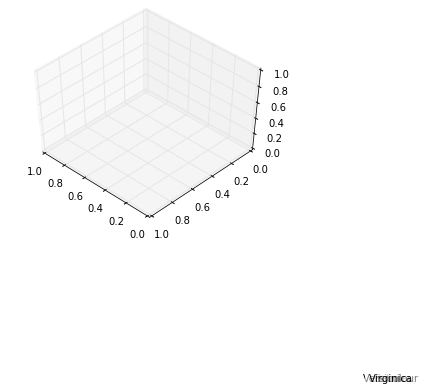

In [172]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets
from array import array
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X = df[0:50].values[:,2:]
y = list(np.asarray(df[0:50].values[:,1], dtype="|S6"))
print type(y)

print 'type = {}, dimension {} by'.format(type(iris.target),len(iris.target))
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
print y
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[[0]])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[[1]])
v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()